In [ ]:
#|default_exp app

In [4]:
%pip install -Uqq fastai duckduckgo_search gradio ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [6]:
#|export
learn = load_learner('./model.pkl')

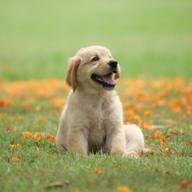

In [7]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [8]:
#|export
learn.predict(im)

('False', TensorImage(0), TensorImage([9.9999e-01, 6.6234e-06]))

In [12]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [13]:
classify_image(im)

{'Dog': 0.9999933242797852, 'Cat': 6.623398348892806e-06}

In [17]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [22]:
m = learn.model
ps = list(m.parameters())
ps[1]
ps[0].shape

torch.Size([64, 3, 7, 7])

In [27]:
import nbdev
nbdev.export.nb_export('app.ipynb')